# **Worldwide Travel Analysis**

## Notebook Objectives
With this notebook we plan to accomplish the following:

- Fetch dataset from Kaggle / Load dataset from local files

- Perform ETL: cleaning, transformation, and restructuring

- Engineer any usable features (e.g., temperature simplifications, duration categories)

- Explore dataset and produce preliminary analysis

- Build visualisations that support research questions

- Prepare cleaned data for dashboard and Streamlit app

## Inputs / Outputs

**Inputs:**
* The only input we need for our analysis is the raw ```worldwide_travel_cities.csv``` file.

**Outputs:**


The files, artefacts we plan to generated in this notebook include:

- A cleaned dataset of the ```worldwide_travel_cities.csv``` file. 

- Feature-engineered dataset

- Exported visualisation images

- Tables/statistics for dashboard or Streamlit app



---

## Section 1 — Import Dependencies

Section 1 content

In [8]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import ast

print('All libraries imported')

All libraries imported


---

## Section 2 — Exploring the Dataset & ETL Pipeline

### Section 2.1 - Loading Raw Dataset

In [10]:
# Load the original dataset
df_wta = pd.read_csv('data/raw_worldwide_travel_cities_dataset.csv')


print(f"Data loaded. Initial shape: {df_wta.shape}")

Data loaded. Initial shape: (560, 19)


### Section 2.2 - Cleaning the Dataset

Making a copy of the dataset to clean it.

In [11]:
# df is a copy of the original dataset where I'll do all my cleaning, processing etc 
df = df_wta.copy()
display(df.head())

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


In [12]:
# using info() to see data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            560 non-null    int64  
 16  wellness           560 non

In [13]:
df.describe(include='all')

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
count,560,560,560,560,560,560.000000,560.000000,560,560,560,560.00000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
unique,560,559,167,7,560,NaN,NaN,545,21,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,44aaa492-d7a7-43bb-a9bf-4f0ecc209def,Granada,United States,europe,"Expansive landscapes filled with geysers, hot ...",NaN,NaN,"{""1"":{""avg"":28.5,""max"":32.5,""min"":25.2},""2"":{""...","[""Short trip"",""Weekend"",""One week""]",Mid-range,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,50,177,1,NaN,NaN,3,120,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.502186,7.914665,NaN,NaN,NaN,3.85000,3.178571,3.728571,2.380357,3.019643,3.792857,3.073214,3.146429,3.028571
std,NaN,NaN,NaN,NaN,NaN,27.980022,78.813803,NaN,NaN,NaN,0.81291,0.798190,0.903920,1.435547,0.921599,0.679329,0.592134,1.018604,0.989699
min,NaN,NaN,NaN,NaN,NaN,-54.807306,-175.201808,NaN,NaN,NaN,2.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,5.268054,-64.439118,NaN,NaN,NaN,3.00000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,31.793618,10.711854,NaN,NaN,NaN,4.00000,3.000000,4.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,43.673199,50.020162,NaN,NaN,NaN,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000


**The ID Column**

The ```id``` column contains 560 unique values, one for each row and it carries no meaning. Using the default dataframe index serves the same purpose and is much cleaner.

In [14]:
# dropping 'id' column as it's not needed for analysis
df.drop(columns=['id'], inplace=True)
display(df.head())

,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


In this case, our dataset did not have any missing values, so the cleaning process was fast. The only thing I did was delete the ```id``` column, as itoffered zero analytical value.

### Section 2.3 - Tranforming the Data

**City Rating Column**

To support clearer comparison between cities, I created a new column that calculates the average rating across all nine rating categories. Using an average instead of a raw sum prevents bias, some cities might score high overall simply because the individual ratings add up, even if they have very low values in certain areas. The averaged score provides a more balanced, and interpretable measure of each city's overall travel appeal.

In [15]:
ratings = df[['culture', 'adventure', 'nature', 'beaches', 'nightlife',
              'cuisine', 'wellness', 'urban', 'seclusion']]

city_rating = ratings.sum(axis=1) / len(ratings.columns)
df['city_rating'] = city_rating.round(1)
display(df.head())

,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,city_rating
0,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2,3.2
1,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5,3.4
2,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4,3.4
3,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2,3.1
4,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2,3.1


There were 9 separate rating columns (culture, nightlife, cuisine, etc.). Individually, they’re useful, but creating a single metric summarising a city's appeal (by averaging), helps:
- create a simple overall quality score
- rank cities more clearly
- support our plan to build a city recommendation using Streamlit

**Annual Average Temperature Column**

We decide to create a new column containing the average annual temperature for each city to make the climate data easier to analyse and compare across cities. The original ```avg_temp_monthly column``` stored temperatures in a JSON-like structure, which made it difficult to use directly in visualisations or statistical analysis. 

To simplify this, I parsed the JSON for each row, extracted the monthly average temperatures, and calculated the mean value across all twelve months. This provides a single, clean annual temperature metric for each city, making it more practical for exploring patterns, testing our hypotheses, and building clear visual insights.

In [16]:
# Creating a function to calculate annual average temperature
def calculate_annual_avg_temp(json_string):
    # Converts the JSON-like string into a dictionary
    data = json.loads(json_string)
    
    # Extracts all monthly average temperatures
    monthly_avgs = [month["avg"] for month in data.values()]
    
    # Returns the average (mean) of the 12 months
    return (sum(monthly_avgs) / len(monthly_avgs))

In [17]:
# Calculating annual average temperature and adding it as a new column
df['annual_avg_temp_(C)'] = df['avg_temp_monthly'].apply(calculate_annual_avg_temp).round(0).astype(int)

display(df.head())

,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,city_rating,annual_avg_temp_(C)
0,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2,3.2,15
1,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5,3.4,27
2,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4,3.4,7
3,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2,3.1,20
4,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2,3.1,29


The original temperature column is a list of 12 monthly averages stored as a string.
This format is too detailed and awkward for analysis. Summarising the climate into a single annual average temperature allows us to:
- compare temperatures across cities
- analyse trends like “do warmer places tend to have higher budgets?”
- simplify the dataset for visualisations

**Ideal Durations Column**

We transformed the ideal_durations column to have proper lists using the literal_eval function.

In [18]:
df['ideal_durations'] = df['ideal_durations'].apply(ast.literal_eval)
df.head()

,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,city_rating,annual_avg_temp_(C)
0,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[Short trip, One week]",Luxury,5,2,2,1,4,5,3,5,2,3.2,15
1,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[Long trip, One week]",Luxury,2,4,5,5,2,3,4,1,5,3.4,27
2,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[Short trip, Weekend, One week]",Luxury,3,5,5,2,3,3,4,2,4,3.4,7
3,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[Weekend, One week, Short trip]",Mid-range,5,3,3,1,3,4,3,4,2,3.1,20
4,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[Short trip, Weekend]",Budget,4,3,3,2,3,4,3,4,2,3.1,29


We then created new columns representing each trip duration. Then using Labada functions, we checked if the phrase was inside the list and if it was, the new column would be assigned a binary value of 1, if not, a binary value of 0.

In [19]:
df['is_short_trip'] = df['ideal_durations'].apply(lambda x: 1 if "Short trip" in x else 0)
df['is_one_week'] = df['ideal_durations'].apply(lambda x: 1 if "One week" in x else 0)
df['is_long_trip'] = df['ideal_durations'].apply(lambda x: 1 if "Long trip" in x else 0)
df['is_weekend'] = df['ideal_durations'].apply(lambda x: 1 if "Weekend" in x else 0)
df['is_day_trip'] = df['ideal_durations'].apply(lambda x: 1 if "Day trip" in x else 0)
df.head()

,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,...,wellness,urban,seclusion,city_rating,annual_avg_temp_(C),is_short_trip,is_one_week,is_long_trip,is_weekend,is_day_trip
0,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[Short trip, One week]",Luxury,5,...,3,5,2,3.2,15,1,1,0,0,0
1,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[Long trip, One week]",Luxury,2,...,4,1,5,3.4,27,0,1,1,0,0
2,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[Short trip, Weekend, One week]",Luxury,3,...,4,2,4,3.4,7,1,1,0,1,0
3,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[Weekend, One week, Short trip]",Mid-range,5,...,3,4,2,3.1,20,1,1,0,1,0
4,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[Short trip, Weekend]",Budget,4,...,3,4,2,3.1,29,1,0,0,1,0


The original column stores multiple trip lengths in one cell (e.g., ["Short trip","Weekend","One week"]). This is not suitable for analysis because you can’t filter, group, or count these categories easily. With the mixed mixed list now separated into individual binary columns we can: 
- analyse which trip types are most common
- correlate trip duration with budget or other features
- build a cleaner dashboard (filters)

**Saving The Cleaned Dataset for Dashboarding**

Some elements that are needed for dashboarding will be different, or absent in the second dataset for analysis.

In [20]:
# df_path = 'data/wtc_cleaned_dashboard_dataset.csv'

# # Saving the file using the df_path
# df.to_csv(df_path, index=False)

**Deleting Unnecessary Columns for Analysis Dataset**

We will be dropping the following columns:
- short_description
- avg_temp_monthly
- ideal_durations
- latitude
- longitude

They will be useful for when we create our Streamlit app. However, they are useless for analysis, so we will dropping deleting them.

In [21]:
# dropping the following columns as they're not needed for analysis
df.drop(columns=['short_description', 'avg_temp_monthly', 'ideal_durations', 'latitude', 'longitude'], inplace=True)
display(df.head())


,city,country,region,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,city_rating,annual_avg_temp_(C),is_short_trip,is_one_week,is_long_trip,is_weekend,is_day_trip
0,Milan,Italy,europe,Luxury,5,2,2,1,4,5,3,5,2,3.2,15,1,1,0,0,0
1,Yasawa Islands,Fiji,oceania,Luxury,2,4,5,5,2,3,4,1,5,3.4,27,0,1,1,0,0
2,Whistler,Canada,north_america,Luxury,3,5,5,2,3,3,4,2,4,3.4,7,1,1,0,1,0
3,Guanajuato,Mexico,north_america,Mid-range,5,3,3,1,3,4,3,4,2,3.1,20,1,1,0,1,0
4,Surabaya,Indonesia,asia,Budget,4,3,3,2,3,4,3,4,2,3.1,29,1,0,0,1,0


**Encoding Budget Level Column**

We're encoding the ```budget_level``` column using dictionary mapping to make it usable for analysis.

In [22]:
mapping = {"Budget": 1, "Mid-range": 2, "Luxury": 3}
df['budget_level'] = df['budget_level'].map(mapping)
display(df.head())

,city,country,region,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,city_rating,annual_avg_temp_(C),is_short_trip,is_one_week,is_long_trip,is_weekend,is_day_trip
0,Milan,Italy,europe,3,5,2,2,1,4,5,3,5,2,3.2,15,1,1,0,0,0
1,Yasawa Islands,Fiji,oceania,3,2,4,5,5,2,3,4,1,5,3.4,27,0,1,1,0,0
2,Whistler,Canada,north_america,3,3,5,5,2,3,3,4,2,4,3.4,7,1,1,0,1,0
3,Guanajuato,Mexico,north_america,2,5,3,3,1,3,4,3,4,2,3.1,20,1,1,0,1,0
4,Surabaya,Indonesia,asia,1,4,3,3,2,3,4,3,4,2,3.1,29,1,0,0,1,0


Budget level was stored as categories (“Budget”, “Mid-range”, “Luxury”), which are strings. We converted these categories into numbers (e.g., 1, 2, 3) to: 
- perform correlations
- create numerical visuals (scatterplots, heatmaps)

---

## Section 4 — Research Question Analysis

### 4.1 — RQ1: Luxury Destinations & Temperature

In [23]:
display(df)

,city,country,region,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,city_rating,annual_avg_temp_(C),is_short_trip,is_one_week,is_long_trip,is_weekend,is_day_trip
0,Milan,Italy,europe,3,5,2,2,1,4,5,3,5,2,3.2,15,1,1,0,0,0
1,Yasawa Islands,Fiji,oceania,3,2,4,5,5,2,3,4,1,5,3.4,27,0,1,1,0,0
2,Whistler,Canada,north_america,3,3,5,5,2,3,3,4,2,4,3.4,7,1,1,0,1,0
3,Guanajuato,Mexico,north_america,2,5,3,3,1,3,4,3,4,2,3.1,20,1,1,0,1,0
4,Surabaya,Indonesia,asia,1,4,3,3,2,3,4,3,4,2,3.1,29,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Maun,Botswana,africa,2,3,5,5,1,2,3,3,2,4,3.1,24,1,1,0,0,0
556,Gothenburg,Sweden,europe,2,4,3,4,3,3,4,3,4,3,3.4,9,1,1,0,1,0
557,Manchester,United Kingdom,europe,2,4,2,2,1,4,4,3,4,2,2.9,10,1,1,0,1,0
558,Copenhagen,Denmark,europe,2,5,2,3,2,4,4,3,5,2,3.3,10,1,1,0,1,0


### 4.2 — RQ2: Budget Level & Trip Duration

In [ ]:
# Display df to begin analysis for second hypothesis
df.head(10)

,city,country,region,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion,city_rating,annual_avg_temp_(C),is_short_trip,is_one_week,is_long_trip,is_weekend,is_day_trip
0,Milan,Italy,europe,3,5,2,2,1,4,5,3,5,2,3.2,15,1,1,0,0,0
1,Yasawa Islands,Fiji,oceania,3,2,4,5,5,2,3,4,1,5,3.4,27,0,1,1,0,0
2,Whistler,Canada,north_america,3,3,5,5,2,3,3,4,2,4,3.4,7,1,1,0,1,0
3,Guanajuato,Mexico,north_america,2,5,3,3,1,3,4,3,4,2,3.1,20,1,1,0,1,0
4,Surabaya,Indonesia,asia,1,4,3,3,2,3,4,3,4,2,3.1,29,1,0,0,1,0
5,Nuuk,Greenland,north_america,3,3,4,5,2,2,3,2,2,5,3.1,-1,1,1,0,0,0
6,Windhoek,Namibia,africa,2,3,4,4,1,3,3,3,3,4,3.1,21,1,1,0,1,0
7,Kingston,Jamaica,north_america,2,4,3,3,3,4,4,3,3,2,3.2,28,1,1,0,0,0
8,Nafplio,Greece,europe,2,4,3,4,3,3,4,3,3,4,3.4,18,1,0,0,1,1
9,Tbilisi,Georgia,asia,1,4,3,3,1,3,4,3,3,3,3.0,14,1,1,0,1,0


**Data Transformation for Hypothesis 2**

Aim: 

- Number of trips at each budget level for different trip duration types

- Identify which budget level is best for a given length in duration for a trip


In [ ]:
# Isolate required columns into a separate data frame 
df_wide=df[['budget_level','is_short_trip','is_one_week','is_long_trip','is_weekend','is_day_trip']]


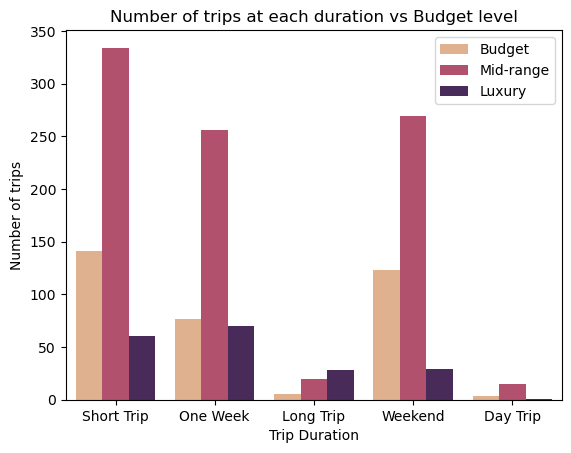

In [ ]:
# Rename columns for better readability on graphs
df_wide = df_wide.rename(columns={
    'is_short_trip': 'Short Trip',
    'is_one_week': 'One Week',
    'is_long_trip': 'Long Trip',
    'is_weekend': 'Weekend',
    'is_day_trip': 'Day Trip'
})
# Pivot table from wide data frame to long data frame for bar chart plot
df_long= pd.melt(frame=df_wide,
        id_vars='budget_level',
        value_vars=['Short Trip','One Week','Long Trip','Weekend','Day Trip'],
        var_name='trip_duration',
)
df_long = df_long[df_long['value'] == 1]

#Plot bar chary for Number of trips at each duration vs each budget level
comparison_of_budget_duration = sns.countplot(data=df_long,
     x='trip_duration',
    hue='budget_level',
    palette='flare',
    )
plt.title("Number of trips at each duration vs Budget level")
plt.xlabel("Trip Duration")
plt.ylabel("Number of trips")
comparison_of_budget_duration.legend(title="Budget Level")
comparison_of_budget_duration.legend(labels=["Budget","Mid-range","Luxury"])
plt.show()


**Review and analysis**

- The bar chart shows the number of trips made at each trip duration for various budget level types. 

- The data contains trips mostly in the mid range and therefore dominates in most categories except Long trip duration, where it is overtaken marginally by luxury travel.

- Luxury trips are far less frequent compared to budget and mid range trips.

To allow better comparison within each budget group, the value counts were converted into percentages so that we could better visualise which trip duration was most popular within each budget group.

In [ ]:
#Transform the table to isolate the values for budget level and trip duration
df_count = df_long.groupby(['budget_level','trip_duration']).count()


In [ ]:
#Create three different data frames of the three budget types to aid percentage calculation 
df_budget_trips= df_count.iloc[:5]
df_midrange_trips = df_count.iloc[5:10] 
df_luxury_trips = df_count.iloc[10:] 


In [ ]:
#Calculate the percentage of each trip type within each budget level
df_budget_trips['percentage'] = df_budget_trips['value'] / df_budget_trips['value'].sum() * 100
df_midrange_trips['percentage'] = df_midrange_trips['value'] / df_midrange_trips['value'].sum() * 100
df_luxury_trips['percentage'] = df_luxury_trips['value'] / df_luxury_trips['value'].sum() * 100



C:\Users\lacma\AppData\Local\Temp\ipykernel_20620\2672081763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget_trips['percentage'] = df_budget_trips['value'] / df_budget_trips['value'].sum() * 100
C:\Users\lacma\AppData\Local\Temp\ipykernel_20620\2672081763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_midrange_trips['percentage'] = df_midrange_trips['value'] / df_midrange_trips['value'].sum() * 100
C:\Users\lacma\AppData\Local\Temp\ipykernel_20620\2672081763.py:3: SettingWithCopyWarnin

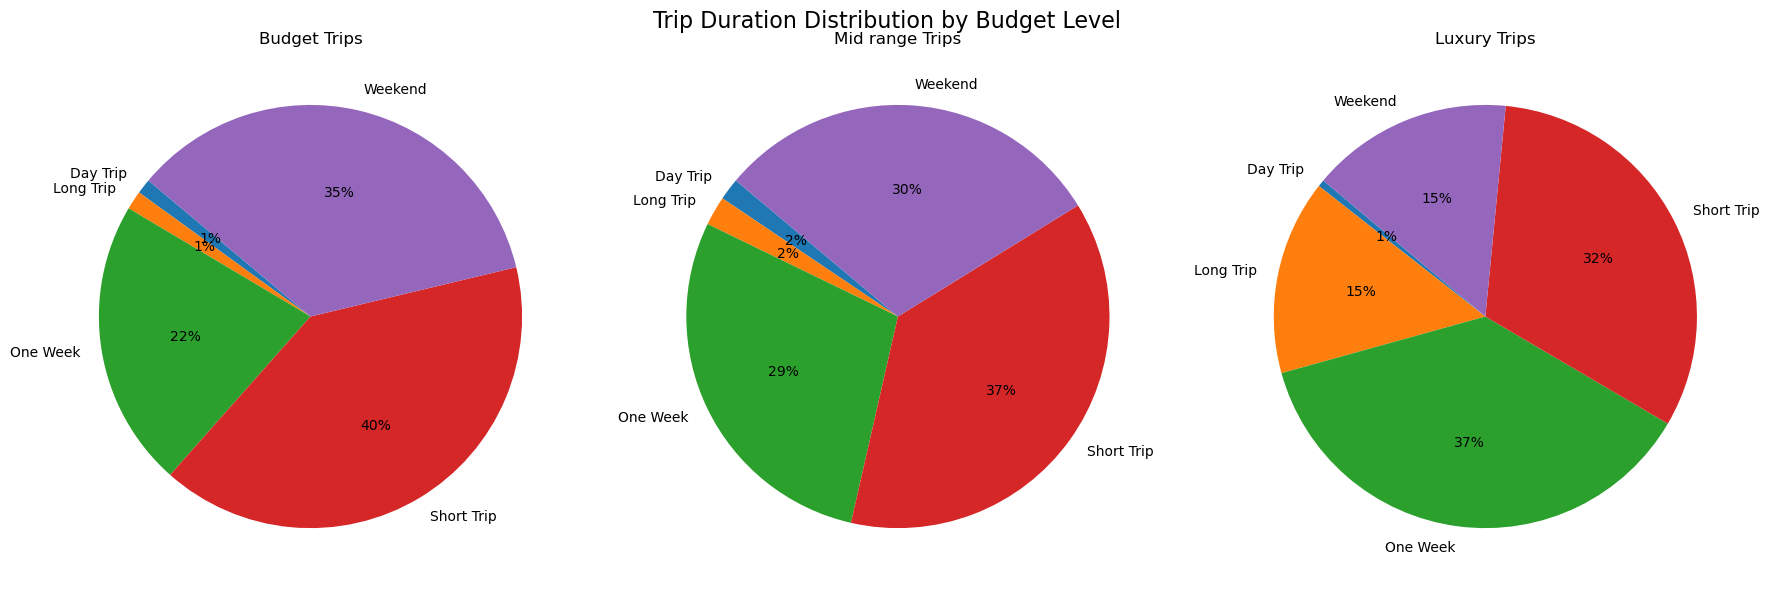

In [ ]:
#Plot pie chart of percentage column for each budget level to visulise which trip duration is most popular 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(df_budget_trips['percentage'],
    labels=df_budget_trips.index.get_level_values(1),
    autopct='%1.0f%%',
    startangle=140
)
axes[0].set_title("Budget Trips")

axes[1].pie(df_midrange_trips['percentage'],
    labels=df_midrange_trips.index.get_level_values(1),
    
    autopct='%1.0f%%',
    startangle=140
)
axes[1].set_title("Mid range Trips")


axes[2].pie(df_luxury_trips['percentage'],
    labels=df_luxury_trips.index.get_level_values(1),
    autopct='%1.0f%%',
    startangle=140
)
axes[2].set_title("Luxury Trips")

fig.suptitle("Trip Duration Distribution by Budget Level", fontsize=16)

plt.tight_layout()
plt.show()

**Review and analysis**

- Budget trips: The most popular category are short trips followed by weekend trips. This could be because families may tend to budget with alot more memebers and mostly take holidays on children's vacation times. 

- Mid range trips: Also mostly favour short trips, perhaps for a similar reason as budget. However we see a slightly higher proportion in longer tripds compared to Budget trips.

- Luxury trips tend to favour one week trips the most but there is a significant increase in the proportion of long trips compares to Mid range and Budget trips.

## Section 5 — General EDA

Broader, non-RQ-specific exploration:

- Global city distribution

- Region/country breakdown (bar chart or treemap)

- Rating comparisons (culture, nature, beaches, cuisine…)

- Scatter plots for relationships

- Summary insights

## Conclusions and Next Steps

Summarise what was accomplished in this notebook.
- State what needs to be done next, for example:

- Integrate outputs into Power BI/Tableau dashboard

- Start building Streamlit interface

- Create presentation slides

- Conduct team code review